In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def preprocess_data(filepath):
    data = pd.read_sas("../" + filepath)
    
    renamed_columns_data = data.rename(columns={
            "V012": "Respondent's current age",
            "V013": "Age in 5-year groups",
            "V175": "Reason for moving to current place of residence",
            "V206": "Sons who have died",
            "V106": "Highest educational level",
            "V207": "Daughters who have died",
            "V022": "Sample strata for sampling errors",
            "V213": "Currently pregnant",
            "V113": "Source of drinking water",
            "V367A": "Wanted last pregnancy"
            })
    
    clean_data = renamed_columns_data[[
        "Respondent's current age",
        "Age in 5-year groups",
        "Reason for moving to current place of residence",
        "Highest educational level",
        "Sample strata for sampling errors",
        "Currently pregnant",
        "Source of drinking water",
        "Wanted last pregnancy"]]
    
    clean_data["No of child deaths"] = renamed_columns_data[["Daughters who have died", "Sons who have died"]].sum(axis=1) * 100
    clean_data["Wanted Pregnancy"] = clean_data["Wanted last pregnancy"].apply(lambda x: 1 if x == 1 else 0)
    
    return clean_data

In [33]:
data_2022 = preprocess_data("shared_data_read_only/Data/DHS/GH_2022_DHS/GHNR8BSD/GHNR8BFL.SAS7BDAT")


/tmp/ipykernel_127376/3030142757.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["No of child deaths"] = renamed_columns_data[["Daughters who have died", "Sons who have died"]].sum(axis=1) * 100
/tmp/ipykernel_127376/3030142757.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Wanted Pregnancy"] = clean_data["Wanted last pregnancy"].apply(lambda x: 1 if x == 1 else 0)


In [34]:
data_2022.head()

,Respondent's current age,Age in 5-year groups,Reason for moving to current place of residence,Highest educational level,Sample strata for sampling errors,Currently pregnant,Source of drinking water,Wanted last pregnancy,No of child deaths,Wanted Pregnancy
0,20.0,2.0,NaN,2.0,2.0,0.0,13.0,2.0,0.0,0
1,31.0,4.0,3.0,2.0,2.0,0.0,21.0,1.0,0.0,1
2,24.0,2.0,NaN,2.0,2.0,0.0,72.0,1.0,0.0,1
3,37.0,5.0,4.0,0.0,2.0,0.0,72.0,1.0,0.0,1
4,37.0,5.0,4.0,0.0,2.0,0.0,72.0,1.0,0.0,1


In [35]:
corr_matrix = data_2022.corr()

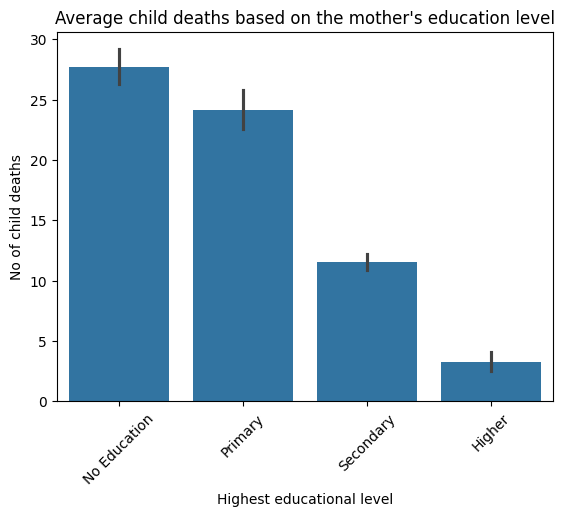

In [36]:
education_mapping = {
        0: 'No Education',
        1: 'Primary',
        2: 'Secondary',
        3: 'Higher'
    }
education_order = ["No Education", "Primary", "Secondary", "Higher"]

data_2022["Highest educational level"] = data_2022["Highest educational level"].replace(education_mapping)

sns.barplot(data_2022, x="Highest educational level", y="No of child deaths", errorbar="se", order=education_order)
plt.xticks(rotation=45)
plt.title("Average child deaths based on the mother's education level")
plt.show()

Text(0.5, 1.0, 'Percentage of people in Ghana based on degree level')

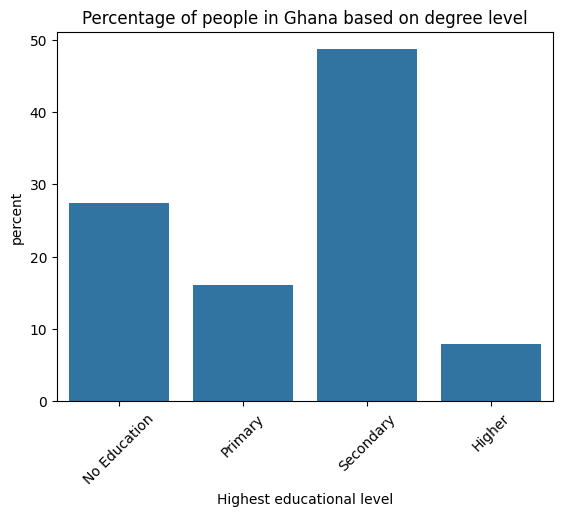

In [31]:
education_order = ["No Education", "Primary", "Secondary", "Higher"]
sns.countplot(data_2022, x="Highest educational level", order=education_order, stat='percent')
plt.xticks(rotation=45)
plt.title("Percentage of people in Ghana based on degree level")